# Performing predictions with Linear Regression

Registering in the required libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model,cross_validation, feature_selection,preprocessing
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

## Simple Linear Regression

The following datasets contains the height and weight of a group of Men

In [5]:
sl_data = pd.read_csv('/home/s6413/MasteringDataScience/Mens_height_weight.csv')

Let's see the distribution of the height and weight

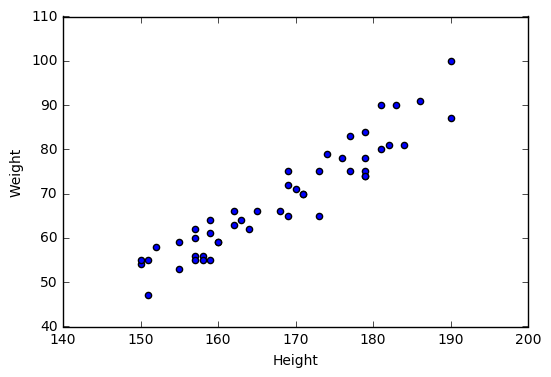

In [6]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(sl_data['Height'],sl_data['Weight'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()


In [7]:
sl_data.corr()

,Height,Weight
Height,1.000000,0.942603
Weight,0.942603,1.000000


We'll apply linear regression with keeping Weight as the dependent variable and x as the independent variable

In [26]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(sl_data.Height[:,np.newaxis], sl_data.Weight)

print('Intercept is ' + str(lm.intercept_) + '\n')

print('Coefficient value of the height is ' + str(lm.coef_) + '\n')

pd.DataFrame(list(zip(sl_data.columns,lm.coef_)), columns = ['features', 'estimatedCoefficients'])



Intercept is -99.2772096063

Coefficient value of the height is [ 1.00092142]



,features,estimatedCoefficients
0,Height,1.000921


Plotting the regression line on the previous scatter plot

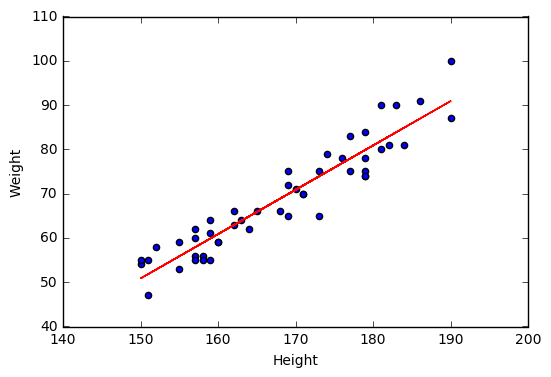

In [11]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(sl_data.Height,sl_data.Weight)
ax.plot(sl_data.Height,lm.predict(sl_data.Height[:, np.newaxis]), color = 'red')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()


## Multiple Regression

To understand multiple regression, we'll be using the NBA data. The following are the field descriptions

1. height = height in feet
2. weight = weight in pounds
3. success_field_goals = percent of successful field goals (out of 100 attempted)
4. success_free_throws = percent of successful free throws (out of 100 attempted)
5. avg_points_scored = average points scored per game

In [12]:
b_data = pd.read_csv('/home/s6413/MasteringDataScience/basketball.csv')

b_data.describe()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


In [13]:
df_corr = b_data.corr().unstack()
df_corr = df_corr[df_corr<1]
df_corr.sort(ascending=False)
df_corr

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


height               weight                 0.834324
weight               height                 0.834324
                     success_field_goals    0.516051
success_field_goals  weight                 0.516051
                     height                 0.495546
height               success_field_goals    0.495546
success_field_goals  avg_points_scored      0.338760
avg_points_scored    success_field_goals    0.338760
success_free_throws  avg_points_scored      0.244852
avg_points_scored    success_free_throws    0.244852
weight               avg_points_scored     -0.009844
avg_points_scored    weight                -0.009844
success_free_throws  success_field_goals   -0.018570
success_field_goals  success_free_throws   -0.018570
avg_points_scored    height                -0.068906
height               avg_points_scored     -0.068906
success_free_throws  height                -0.259271
height               success_free_throws   -0.259271
success_free_throws  weight                -0.

Here the average points scored is taken as the dependent variable. We'll see how is the distribution of each of the variable w.r.t the dependent variable

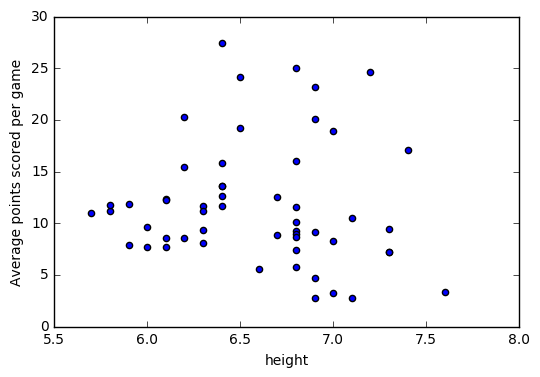

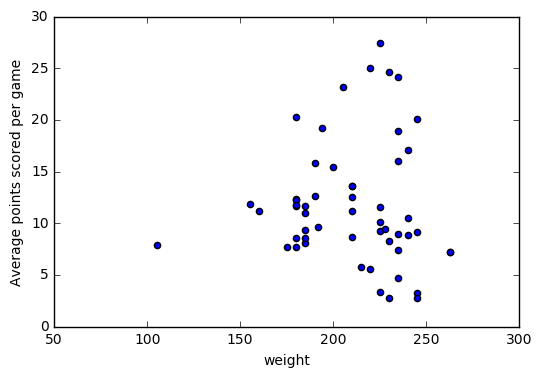

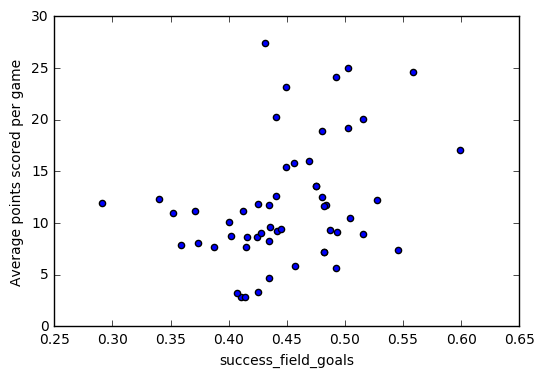

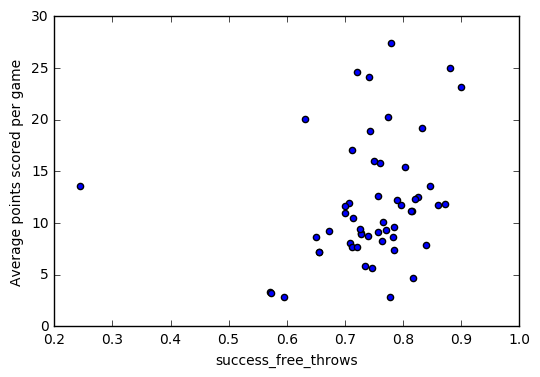

In [14]:
X_columns = b_data.columns[:-1]

for i in X_columns:
    fig, ax = plt.subplots(1, 1)  
    ax.scatter(b_data[i], b_data.avg_points_scored)
    ax.set_xlabel(i)
    ax.set_ylabel('Average points scored per game')
    plt.show()

Let's see how each of the variables are correlated with each other

In [15]:
b_data.corr()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
height,1.000000,0.834324,0.495546,-0.259271,-0.068906
weight,0.834324,1.000000,0.516051,-0.290159,-0.009844
success_field_goals,0.495546,0.516051,1.000000,-0.018570,0.338760
success_free_throws,-0.259271,-0.290159,-0.018570,1.000000,0.244852
avg_points_scored,-0.068906,-0.009844,0.338760,0.244852,1.000000


Let's split the data into train and test where the train set will be used to build the data and the model will be applied to the test set.

In [16]:
X = b_data.values.copy() 
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split( X[:, :-1], X[:, -1], train_size=0.80)

We'll generate a Linear Model with the given data 

In [17]:
result = sm.OLS( y_train, add_constant(X_train) ).fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3.104
Date:                Sun, 04 Dec 2016   Prob (F-statistic):             0.0264
Time:                        18:29:21   Log-Likelihood:                -130.00
No. Observations:                  43   AIC:                             270.0
Df Residuals:                      38   BIC:                             278.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         15.0577     15.647      0.962      0.342       -16.618    46.733
x1            -5.8842      3.020     -1.949      0.059       -11.997     0.229
x2             0.0310      0.047      0.654      0.517        -0.065     0.127
x3            48.7426     17.858      2.729      0.010        12.591    84.894
x4             8.9398      8.103      1.103      0.277        -7.464    25.344
==============================================================================
Omnibus:                        9.415   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.519
Skew:                           0.972   Prob(JB):                       0.0141
Kurtosis:                       3.988   Cond. No.                     4.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the 3rd variable is significant and the others aren't based on the pvalue. We'll recreate the model only using that variable.

In [18]:
result_alternate = sm.OLS( y_train, add_constant(X_train[:,2]) ).fit()
result_alternate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.683
Date:                Sun, 04 Dec 2016   Prob (F-statistic):             0.0619
Time:                        18:29:22   Log-Likelihood:                -134.23
No. Observations:                  43   AIC:                             272.5
Df Residuals:                      41   BIC:                             276.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.8614      7.371     -0.388      0.700       -17.747    12.024
x1            31.5692     16.449      1.919      0.062        -1.650    64.788
==============================================================================
Omnibus:                        7.976   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.867
Skew:                           0.906   Prob(JB):                       0.0323
Kurtosis:                       3.742   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets predict on the test data and see how much is the error 

In [20]:
ypred = result.predict(add_constant(X_valid))
print(mse(ypred,y_valid))

ypred_alternate = result_alternate.predict(add_constant(X_valid[:, 2]))
print(mse(ypred_alternate,y_valid))


36.3997378507
31.9924444671


Lets see the actual vs predicted for the 1st model

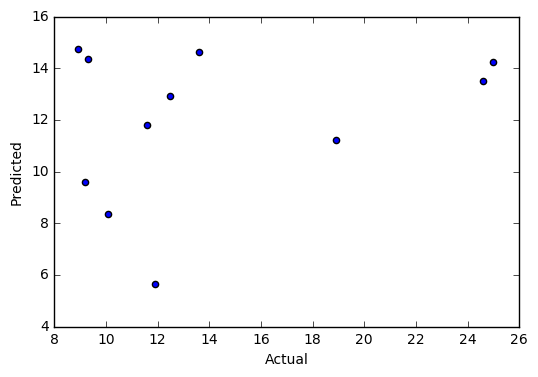

In [21]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

Same plot for the 2nd plot

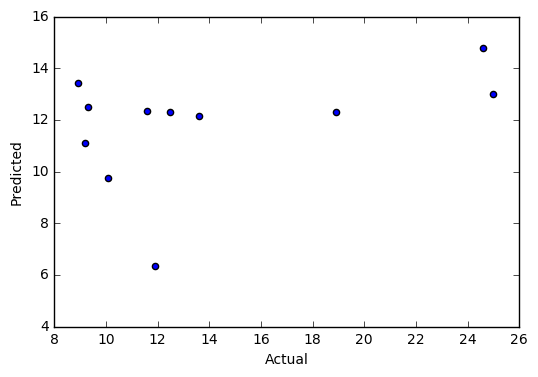

In [22]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred_alternate)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [25]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

print('Intercept is ' + str(lm.intercept_) + '\n')

pd.DataFrame(list(zip(b_data.columns,lm.coef_)), columns = ['features', 'estimatedCoefficients'])

Intercept is 15.057705578



,features,estimatedCoefficients
0,height,-5.884208
1,weight,0.031036
2,success_field_goals,48.742616
3,success_free_throws,8.939842


Lets see how is the R square

In [162]:
cross_validation.cross_val_score(lm, X_train, y_train, scoring='r2')

array([-0.3043391 , -0.42402161,  0.26890649])

Lets predict the on the test data

In [169]:
ypred = lm.predict(X_valid)

mean_squared_error(ypred,y_valid)

35.208385051598597

Plotting the predicted vs the actual

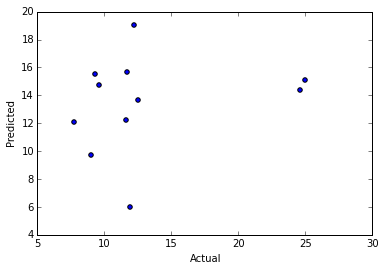

In [170]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()